In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Chargement
url = "Data/data.csv"
df = pd.read_csv(url, sep=';')

In [39]:
# Vérifier les types et les valeurs manquantes

print("--- INFO ---")

df.info()


print("\n--- STATISTIQUES ---")

display(df.describe())


print("\n--- VALEURS MANQUANTES ---")

print(df.isnull().sum())

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



--- VALEURS MANQUANTES ---
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

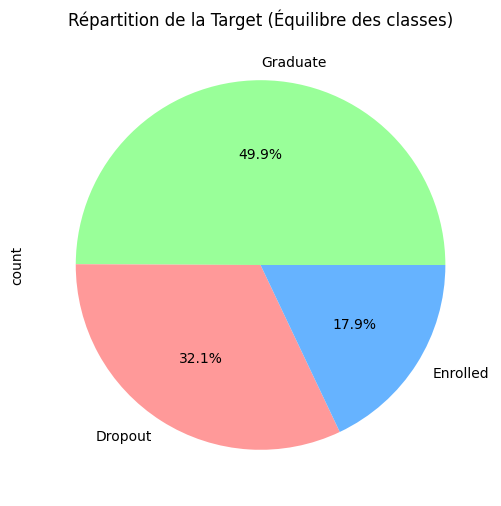

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
df['Target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#99ff99','#ff9999','#66b3ff'])
plt.title("Répartition de la Target (Équilibre des classes)")
plt.show()

Nous avons vérifié la distribution de la variable cible. Avec 32% de décrocheurs, le jeu de données est suffisamment équilibré pour qu'un modèle apprenne sans biais majeur.

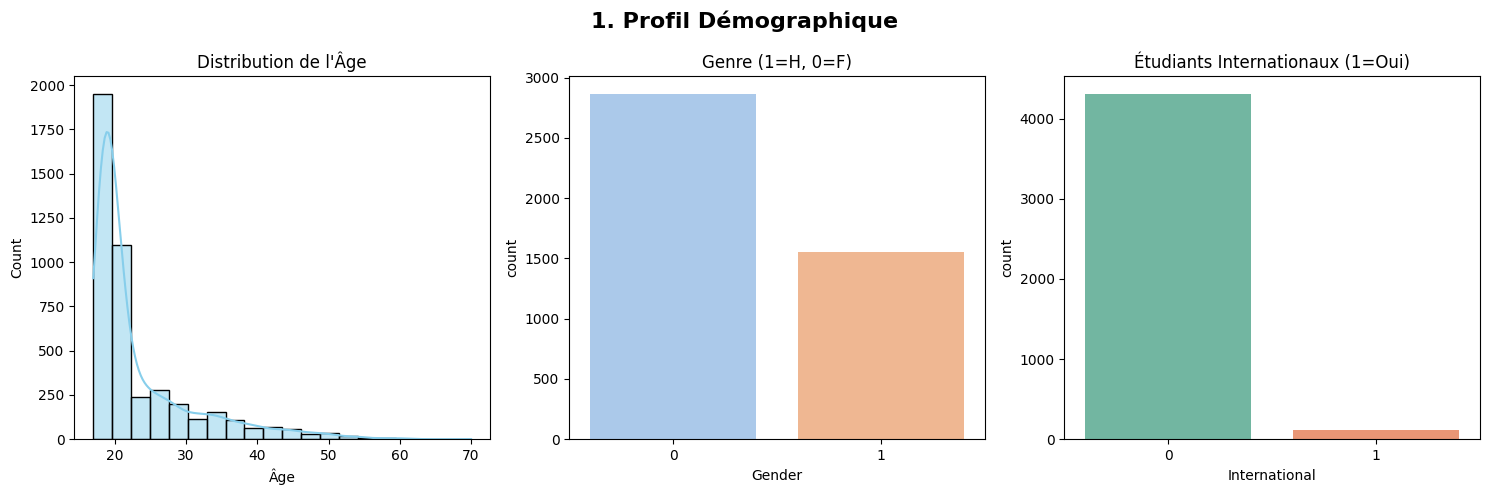

In [41]:
# --- 1. VARIABLES DÉMOGRAPHIQUES ---
vars_demo = ['Age at enrollment', 'Gender', 'International']
# Note : Vérifie bien tes noms de colonnes (si tu as tout mis en minuscule avant, adapte ici)

plt.figure(figsize=(15, 5))
plt.suptitle("1. Profil Démographique", fontsize=16, fontweight='bold')

# Age (Histogramme car continu)
plt.subplot(1, 3, 1)
sns.histplot(df['Age at enrollment'], kde=True, color='skyblue', bins=20)
plt.title("Distribution de l'Âge")
plt.xlabel("Âge")

# Gender (Barplot car catégoriel)
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', hue='Gender', data=df, palette='pastel', legend=False)
plt.title("Genre (1=H, 0=F)")

# International (Barplot)
plt.subplot(1, 3, 3)
sns.countplot(x='International',hue= 'International', data=df, palette='Set2', legend=False)
plt.title("Étudiants Internationaux (1=Oui)")

plt.tight_layout()
plt.show()

1. Profil Démographique

Ce qu'on retient : La population est surtout jeune (18-20 ans), ce qui correspond à une entrée juste après le lycée. On note quand même la présence d'adultes en reprise d'études (jusqu'à 70 ans). Il y a une majorité de femmes et très peu d'étudiants étrangers.

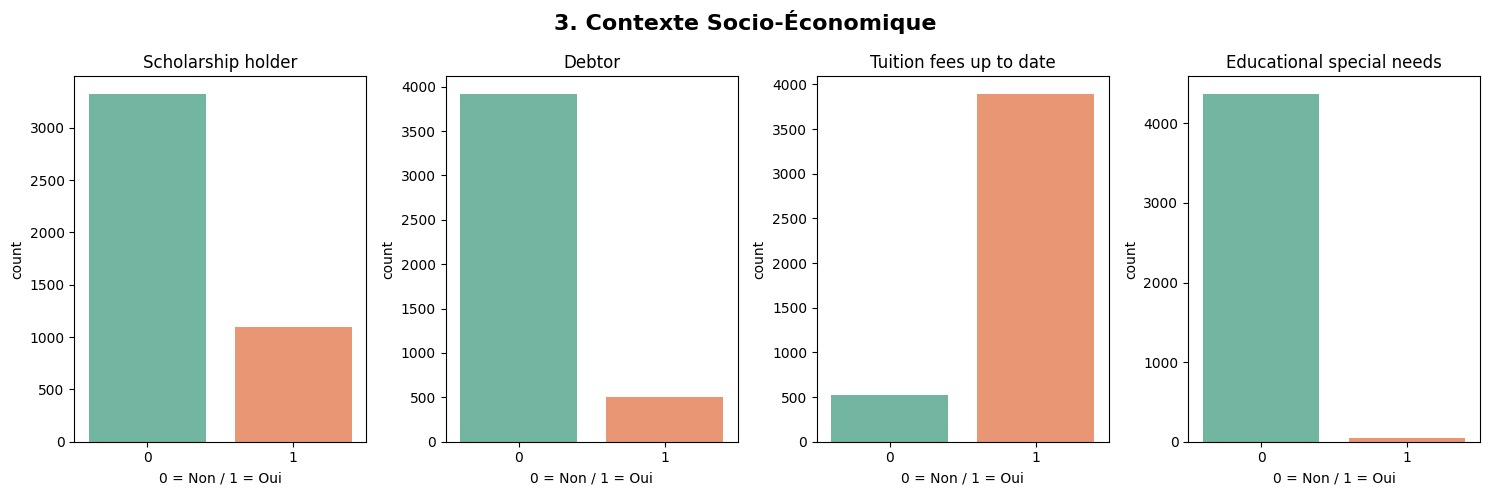

In [42]:
# --- 3. VARIABLES SOCIO-ÉCONOMIQUES ---
socio_cols = ['Scholarship holder', 'Debtor','Tuition fees up to date', 'Educational special needs']

plt.figure(figsize=(15, 5))
plt.suptitle("3. Contexte Socio-Économique", fontsize=16, fontweight='bold')

for i, col in enumerate(socio_cols):
    plt.subplot(1, 4, i+1)
    # Countplot car ce sont des variables Oui/Non (Binaires)
    sns.countplot(x=col,hue=col , data=df, palette='Set2',legend=False)
    plt.title(col)
    plt.xlabel("0 = Non / 1 = Oui")

plt.tight_layout()
plt.show()

2. Contexte Socio-Économique

Ce qu'on retient : Environ 30% des étudiants sont boursiers. La grande majorité est à jour dans ses paiements. Cependant, il faut surveiller de près la petite minorité qui a des dettes ou des impayés, car c'est souvent le premier signe financier d'un futur décrochage.


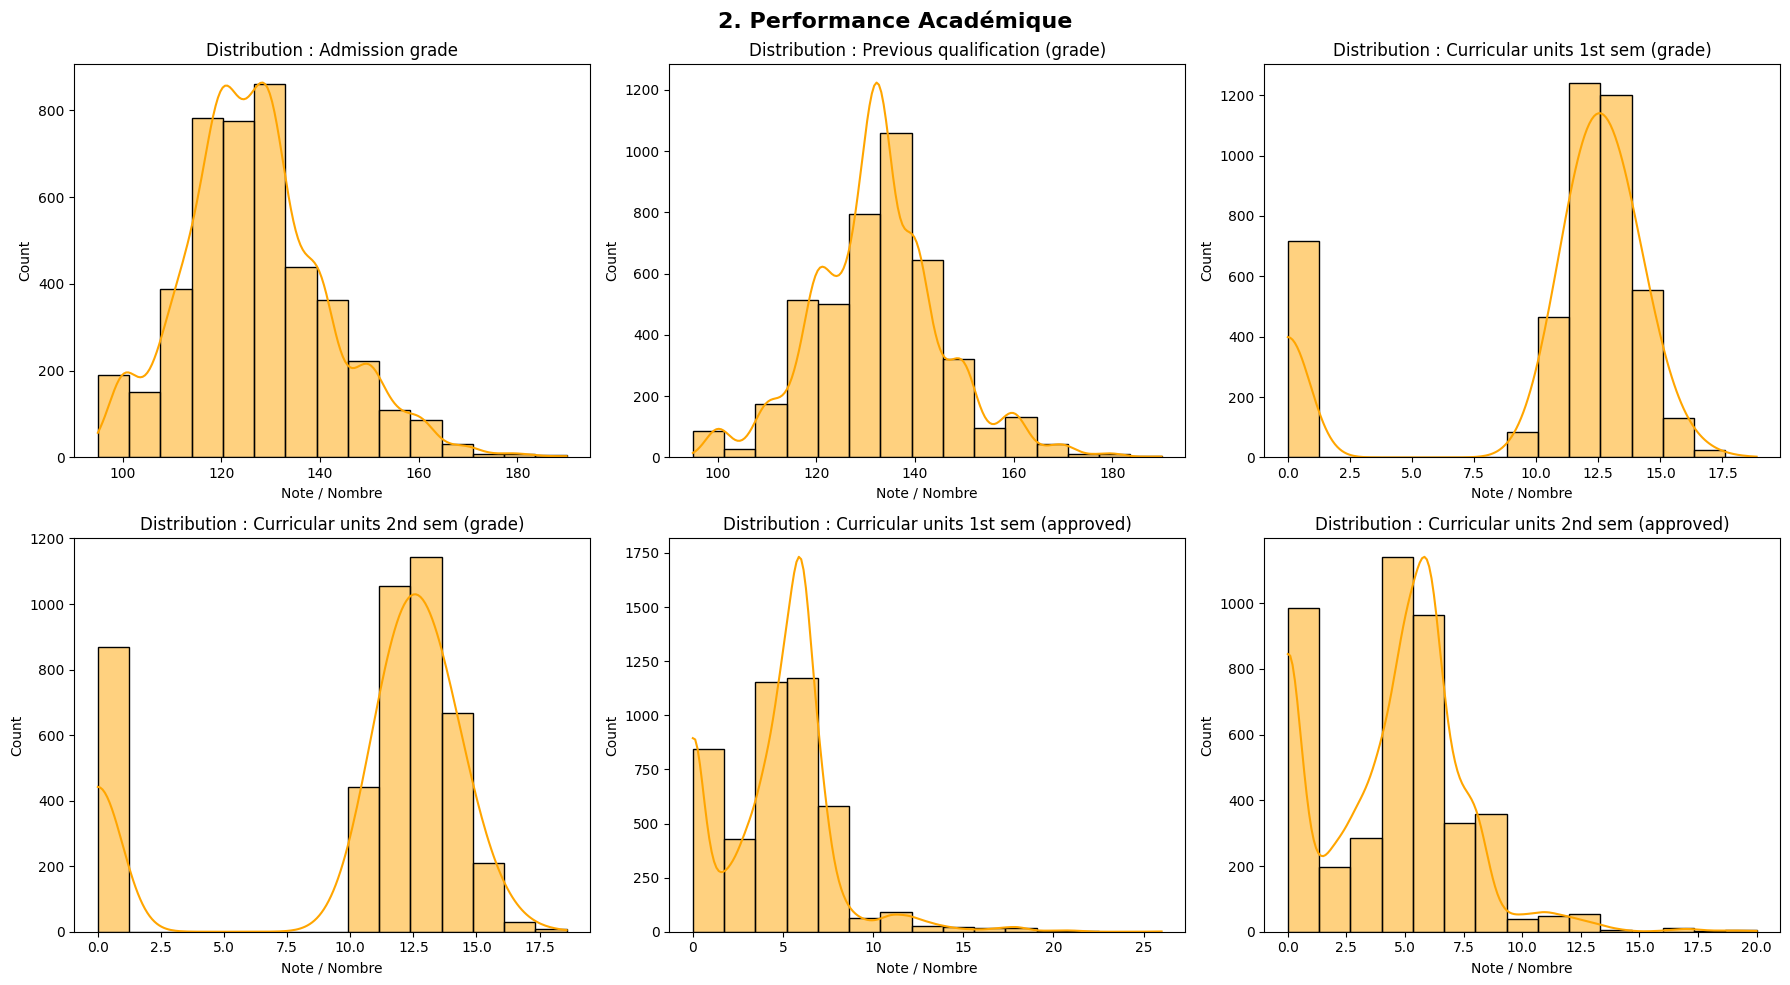

In [43]:
# --- 2. VARIABLES ACADÉMIQUES ---
# On sélectionne les plus parlantes pour éviter la surcharge
# J'ai regroupé les notes (grade) et les validations (approved)
acad_cols = [
    'Admission grade', 'Previous qualification (grade)',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'
]

plt.figure(figsize=(18, 10))
plt.suptitle("2. Performance Académique", fontsize=16, fontweight='bold')

for i, col in enumerate(acad_cols):
    plt.subplot(2, 3, i+1)
    # Histogramme pour voir la distribution des notes (Loi Normale ?)
    sns.histplot(df[col], kde=True, color='orange', bins=15)
    plt.title(f"Distribution : {col}")
    plt.xlabel("Note / Nombre")

plt.tight_layout()
plt.show()

2. Performance Académique

Ce qu'on retient : Le niveau scolaire à l'entrée est assez homogène. Durant le cursus (S1 et S2), on remarque deux groupes distincts :

La majorité des élèves, qui tourne autour de 12-13/20 de moyenne.

Un groupe en difficulté avec un "pic à 0" (zéro pointé), qui signale souvent des absences aux examens ou un abandon immédiat.

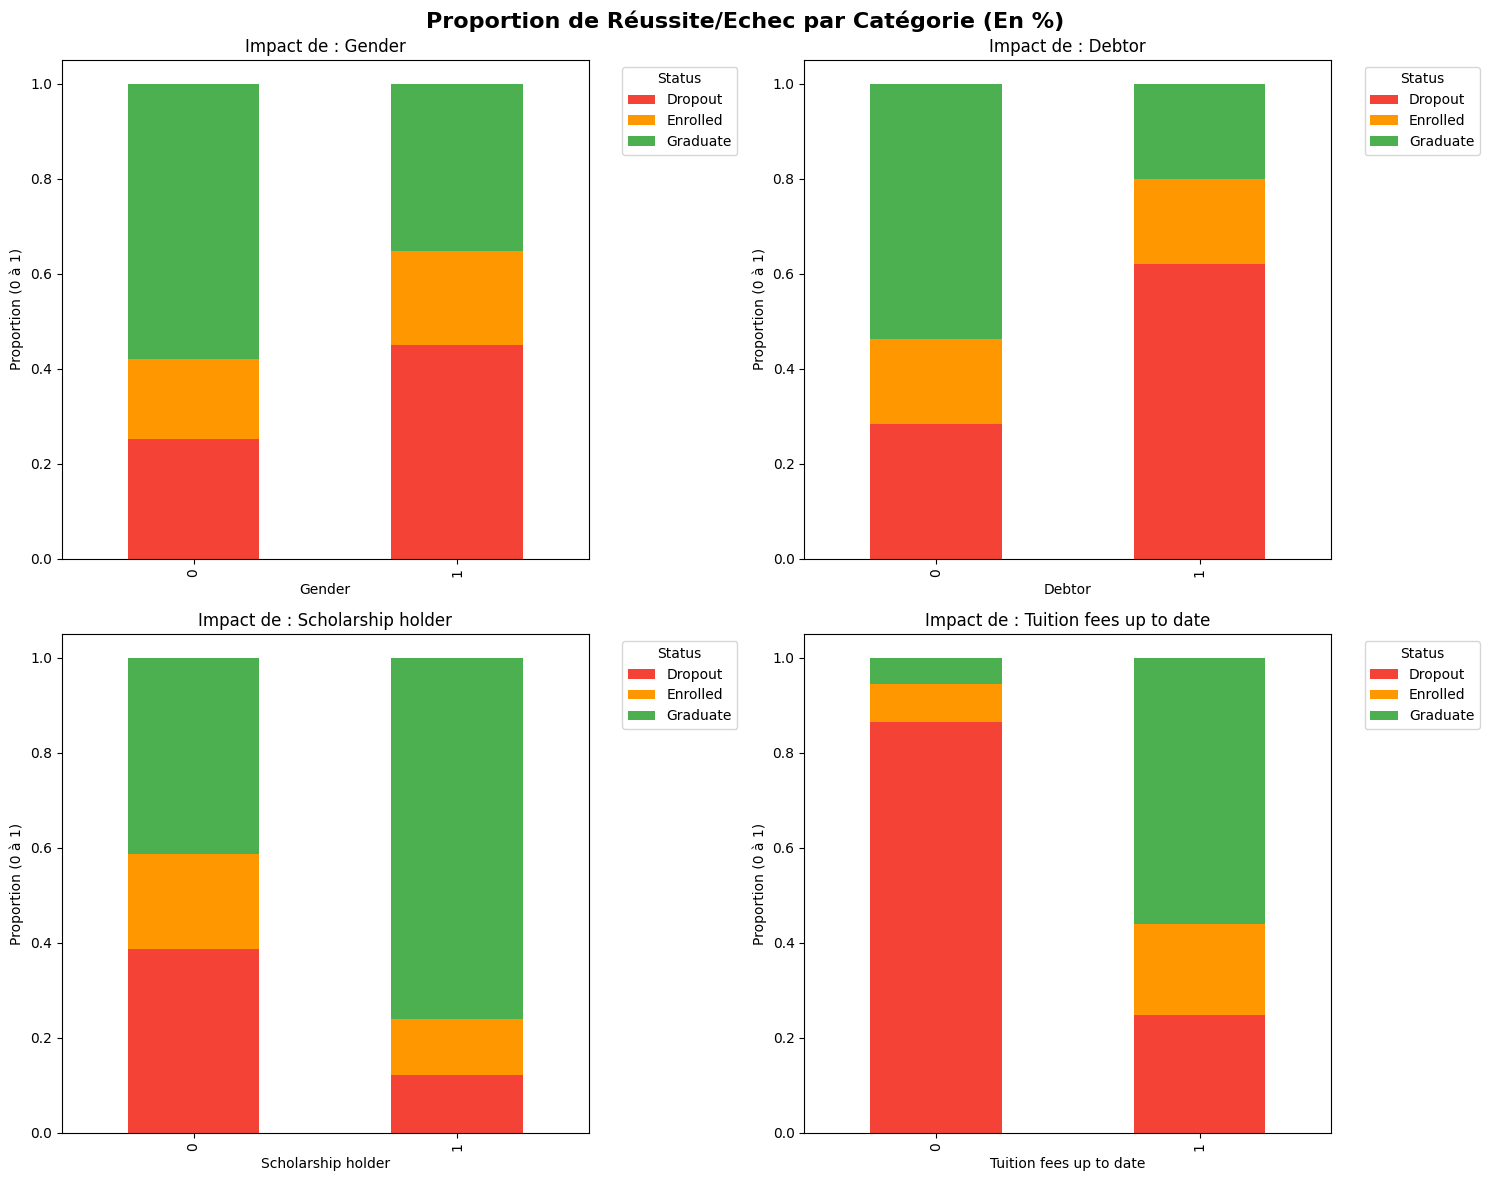

In [44]:
# --- ANALYSE BIVARIÉE : PROPORTIONS (NORMALISÉE) ---
cat_vars = ['Gender', 'Debtor', 'Scholarship holder', 'Tuition fees up to date']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.suptitle("Proportion de Réussite/Echec par Catégorie (En %)", fontsize=16, fontweight='bold')
axes = axes.flatten() # Pour parcourir la grille facilement

for i, col in enumerate(cat_vars):
    # 1. On calcule la Table Croisée (Crosstab)
    # normalize='index' transforme les nombres en pourcentages (0.0 à 1.0)
    cross_tab = pd.crosstab(df[col], df['Target'], normalize='index')
    
    # 2. On trie les colonnes pour garder l'ordre Dropout -> Enrolled -> Graduate
    # (Assure-toi que les colonnes existent bien dans cet ordre)
    cols_order = ['Dropout', 'Enrolled', 'Graduate']
    cross_tab = cross_tab[cols_order]
    
    # 3. On affiche le graphique empilé (Stacked)
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], color=['#F44336', '#FF9800', '#4CAF50'])
    
    axes[i].set_title(f"Impact de : {col}")
    axes[i].set_ylabel("Proportion (0 à 1)")
    axes[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

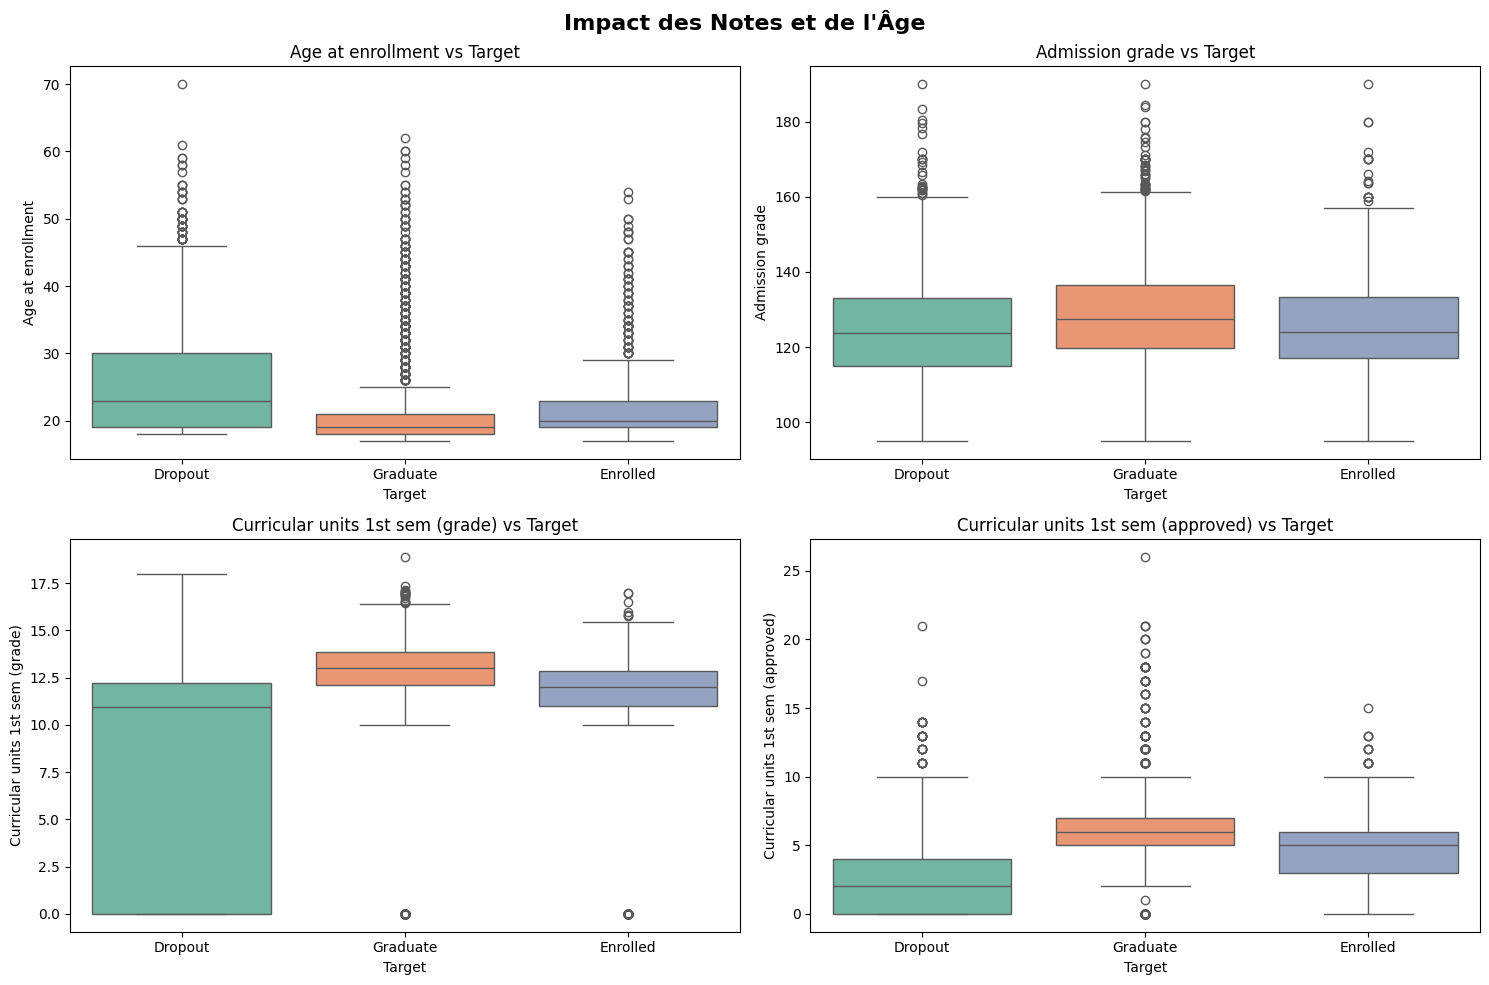

In [45]:
# --- ANALYSE BIVARIÉE : NUMERIQUE vs TARGET ---
# On regarde l'âge et les notes du 1er semestre
num_vars = ['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)']

plt.figure(figsize=(15, 10))
plt.suptitle("Impact des Notes et de l'Âge", fontsize=16, fontweight='bold')

for i, col in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    
    # CORRECTION ICI : On ajoute hue='Target' et legend=False
    sns.boxplot(x='Target', y=col, data=df, hue='Target', legend=False, palette='Set2')
    
    plt.title(f"{col} vs Target")

plt.tight_layout()
plt.show()

Synthèse de l'Analyse Bivariée (Facteurs Numériques)
Observations clés (Performance et Âge) :

Le fossé académique (Le meilleur prédicteur) :
Contrairement à la note d'admission (Admission grade) qui sépare peu les étudiants, les résultats obtenus pendant le cursus sont décisifs.
Pour les notes du 1er semestre (Grade), les décrocheurs se situent majoritairement en dessous de la moyenne (10/20), tandis que les diplômés se maintiennent au-dessus de 12.
Le nombre d'unités validées (Approved) est encore plus discriminant : les décrocheurs échouent à valider leurs matières (médiane proche de 0 à 4), créant une séparation nette avec les diplômés.
Le facteur Âge :
L'âge à l'inscription est un facteur de risque confirmé. Les décrocheurs sont sensiblement plus âgés (médiane vers 25-30 ans) que les étudiants qui réussissent (médiane à 18-20 ans), soulignant la difficulté de réussir une reprise d'études ou une inscription tardive.

Observations clés (Analyse des Proportions) :

Le "Mur" Financier (Le facteur le plus critique) :
Les indicateurs financiers sont les prédicteurs les plus violents du décrochage.
Le non-paiement des frais de scolarité (Tuition fees = 0) entraîne un taux d'abandon massif supérieur à 80%.
Le statut de débiteur (Debtor = 1) est également critique, avec un taux d'échec situé entre 60% et 70%.
L'Absence de Bourse (Facteur de risque) :
On constate que les non-boursiers décrochent davantage (~35%) que les boursiers. Cela confirme que la bourse joue bien son rôle de "filet de sécurité" : ne pas en avoir fragilise l'étudiant face aux difficultés financières.
Le Genre :
Il existe une disparité notable : les hommes ont une probabilité de décrochage bien supérieure aux femmes, approchant les 50% (soit près d'un étudiant sur deux), contre un taux beaucoup plus faible chez les étudiantes.

/home/michou/dropout-prediction-ml/venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/michou/dropout-prediction-ml/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


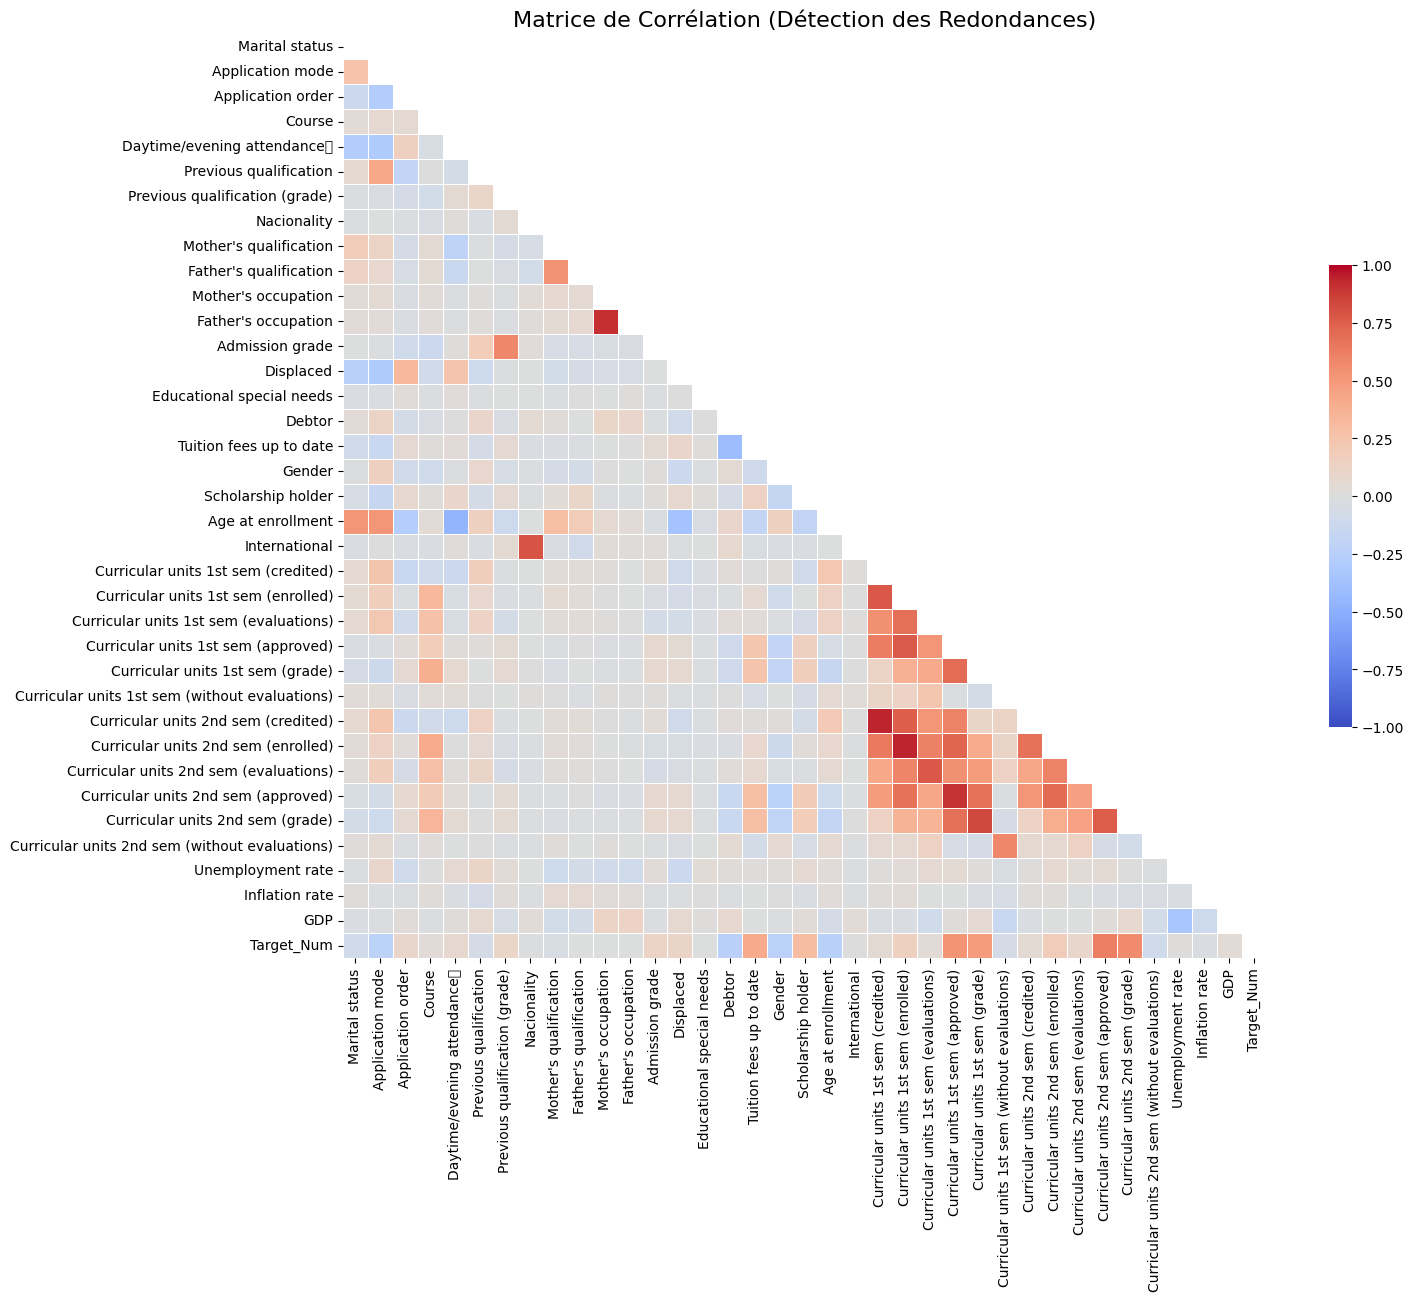

--- TOP 10 DES VARIABLES LIÉES À LA RÉUSSITE ---
Target_Num                             1.000000
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Age at enrollment                      0.243438
Debtor                                 0.240999
Gender                                 0.229270
Application mode                       0.221747
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 1st sem (enrolled)    0.155974
Admission grade                        0.120889
Displaced                              0.113986
Name: Target_Num, dtype: float64


In [46]:
# --- ANALYSE MULTIVARIÉE : CORRÉLATION (HEATMAP) ---
import numpy as np

# 1. Préparation : On transforme la Target en chiffre pour le calcul
df_calc = df.copy()
df_calc['Target_Num'] = df_calc['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# 2. Calcul de la matrice
corr_matrix = df_calc.corr(numeric_only=True)

# 3. Affichage
plt.figure(figsize=(16, 12))
# Le masque sert à cacher le triangle du haut (qui est inutile car c'est un miroir)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Matrice de Corrélation (Détection des Redondances)", fontsize=16)
plt.show()

# 4. Zoom sur les variables les plus importantes (Top 10)
print("--- TOP 10 DES VARIABLES LIÉES À LA RÉUSSITE ---")
# On trie pour voir celles qui ont le plus fort lien (positif ou négatif) avec la cible
print(corr_matrix['Target_Num'].abs().sort_values(ascending=False).head(15))

In [47]:
print("--- Course ---")
print(df['Course'].value_counts())

print("\n--- Marital Status ---")
print(df['Marital status'].value_counts())

print("\n---Application mode ---")
print(df['Application mode'].value_counts())

print("\n--- Application order ---")
print(df['Application order'].value_counts())	

print(df['Curricular units 2nd sem (without evaluations)'].value_counts())

print(df['Curricular units 1st sem (credited)'].value_counts())

--- Course ---
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

--- Marital Status ---
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

---Application mode ---
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

--- Application order ---
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
Curricular units 2nd sem (without evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64
Curricular units 1st se

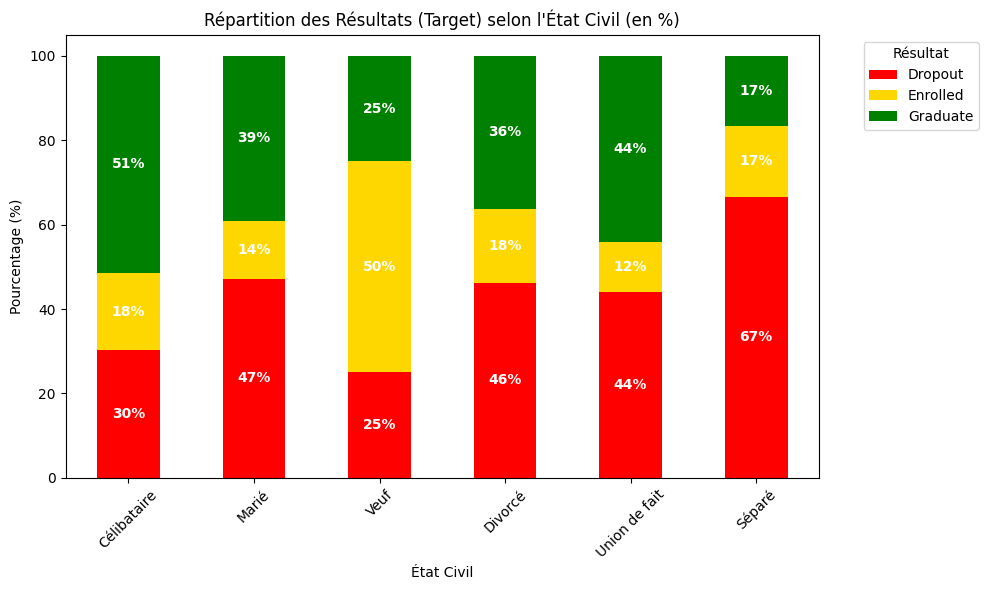

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. On crée un tableau croisé (Crosstab)
# normalize='index' transforme les nombres en pourcentages (la ligne fait 100%)
cross_tab = pd.crosstab(df['Marital status'], df['Target'], normalize='index') * 100

# 2. On rend les noms plus lisibles (optionnel mais mieux)
# Rappel : 1=Célib, 2=Marié, 3=Veuf, 4=Divorcé, 5=Union, 6=Séparé
mapping = {1: 'Célibataire', 2: 'Marié', 3: 'Veuf', 4: 'Divorcé', 5: 'Union de fait', 6: 'Séparé'}
cross_tab.index = cross_tab.index.map(mapping)

# 3. On trace le graphique empilé
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'gold', 'green'])

# 4. Finitions
plt.title("Répartition des Résultats (Target) selon l'État Civil (en %)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("État Civil")
plt.legend(title='Résultat', bbox_to_anchor=(1.05, 1), loc='upper left') # Légende sur le côté
plt.xticks(rotation=45)

# 5. Ajouter les chiffres (%) sur les barres pour bien lire
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()